In [83]:
import pandas as pd
from scipy.io import arff
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
from math import floor
from collections import Counter

Data using downloaded files

In [84]:
X: pd.DataFrame
y: pd.DataFrame

arff_file_year_5 = arff.loadarff('PolishBankruptcy/5year.arff')

df = pd.DataFrame(arff_file_year_5[0])
df

for i in range(len(df)):
    if df.loc[i, 'class'] == b'0':
        df.loc[i, 'class'] = 0.0
    else:
        df.loc[i, 'class'] = 1.0

#df

Standardizing Data

In [85]:
data = df.dropna()
scaler = preprocessing.StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled_transposed = data_scaled.transpose()

attribute_names = [
    "X1",
    "X2",
    "X3",
    "X4",
    "X5",
    "X6",
    "X7",
    "X8",
    "X9",
    "X10",
    "X11",
    "X12",
    "X13",
    "X14",
    "X15",
    "X16",
    "X17",
    "X18",
    "X19",
    "X20",
    "X21",
    "X22",
    "X23",
    "X24",
    "X25",
    "X26",
    "X27",
    "X28",
    "X29",
    "X30",
    "X31",
    "X32",
    "X33",
    "X34",
    "X35",
    "X36",
    "X37",
    "X38",
    "X39",
    "X40",
    "X41",
    "X42",
    "X43",
    "X44",
    "X45",
    "X46",
    "X47",
    "X48",
    "X49",
    "X50",
    "X51",
    "X52",
    "X53",
    "X54",
    "X55",
    "X56",
    "X57",
    "X58",
    "X59",
    "X60",
    "X61",
    "X62",
    "X63",
    "X64",
    "class"
]

attribute_dict = {}

for i in range(len(data_scaled_transposed)):
    attribute_dict[attribute_names[i]] = data_scaled_transposed[i]

standardisedData = pd.DataFrame(attribute_dict)
#standardisedData


Normalize Data

In [86]:
data
normalizer = preprocessing.Normalizer()
data_normalised = normalizer.fit_transform(data)
data_normalised_transposed = data_normalised.transpose()

normalised_dict = {}

for i in range(len(data_normalised_transposed)):
    normalised_dict[attribute_names[i]] = data_normalised_transposed[i]


normalisedData = pd.DataFrame(normalised_dict)
#normalisedData

Normalised and Standardised data

In [87]:

normalizer = preprocessing.Normalizer()
data_normalised_standardised = normalizer.fit_transform(standardisedData)
data_normalised_standardised_transposed = data_normalised_standardised.transpose()

normalised_standardised_dict = {}

for i in range(len(data_normalised_standardised_transposed)):
    normalised_standardised_dict[attribute_names[i]] = data_normalised_standardised_transposed[i]


normalised_StandardisedData = pd.DataFrame(normalised_standardised_dict)
#normalised_StandardisedData

Data discretization

In [88]:
atttributes = normalised_StandardisedData.columns.values.tolist()

est = preprocessing.KBinsDiscretizer(n_bins=12, encode='ordinal', strategy='quantile', subsample=None)
est.fit(normalised_StandardisedData)
PreprocessedData_tranformed = est.transform(normalised_StandardisedData).transpose()

for i in range(len(PreprocessedData_tranformed)):
    attribute_dict[atttributes[i]] = PreprocessedData_tranformed[i]
    
attribute_dict[attribute_names[len(data_scaled_transposed)-1]] = pd.cut(data_scaled_transposed[len(data_scaled_transposed)-1],2,labels=[0,1])

discretizedData = pd.DataFrame(attribute_dict)
    
#discretizedData

Visulizing Data and discretization

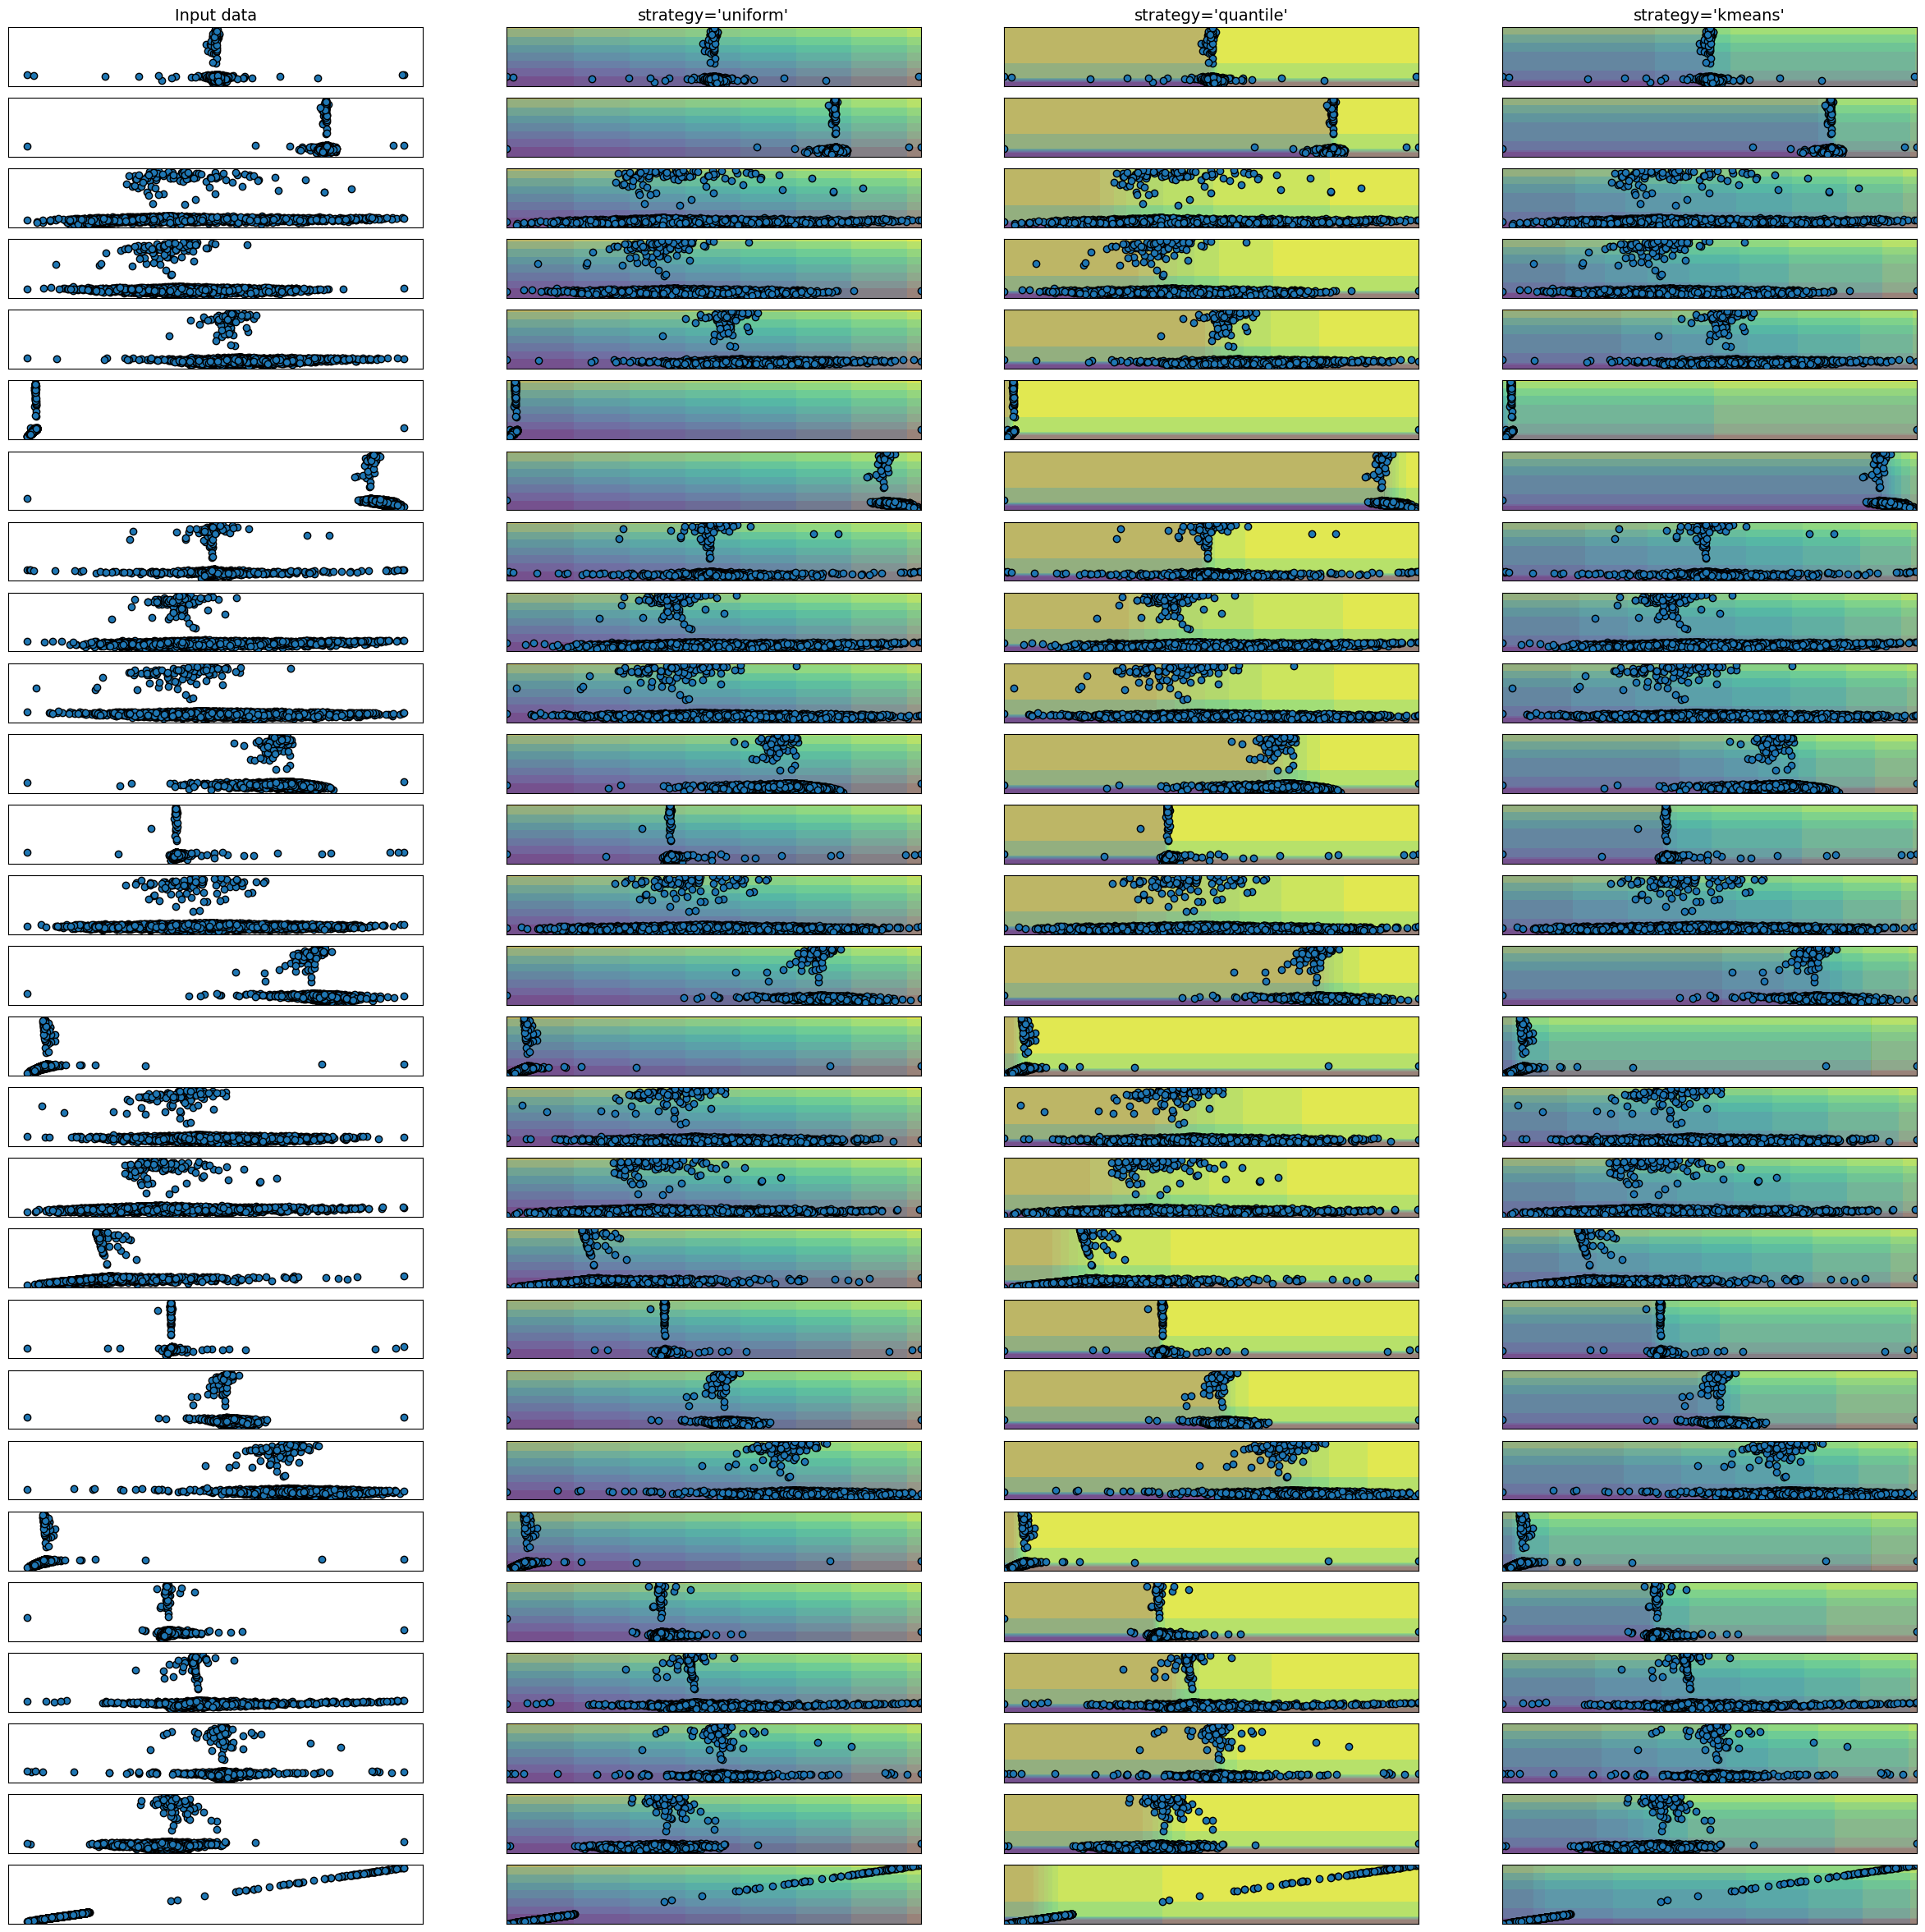

In [89]:
strategies = ["uniform", "quantile", "kmeans"]


keeping_attributes = ["X23","X1","X7","X49","X9","X3","X2","X59","X6","X4", "X51", "X8", "class"]

keeping_attributes_2 = ['Attr1', 'Attr2', 'Attr3','Attr4',	'Attr5',	'Attr6',	'Attr7','Attr8','Attr9','Attr10','class']

most_common_attributes = ['X52', 'X40', 'X25', 'X5', 'X9', 'X13', 'X58', 'X15', 'X27', 'X36', 'X22', 'X42', 'X31', 'X48', 'X32', 'X57', 'X12', 'X35', 'X6', 'X53', 'X16', 'X11', 'X55', 'X14', 'X29', 'X41','class']

for attribute in normalised_StandardisedData.columns.values.tolist():
    if attribute not in most_common_attributes:
        del normalised_StandardisedData[attribute]



figure = plt.figure(figsize=(30,30))
i = 1


for ds_cnt, col in enumerate(normalised_StandardisedData.columns.values.tolist()):
    ax = plt.subplot(len(normalised_StandardisedData.columns.values.tolist()), len(strategies) + 1, i)
    ax.scatter(normalised_StandardisedData[col], normalised_StandardisedData['class'], edgecolors="k")
    if ds_cnt == 0:
        ax.set_title("Input data", size=14)

    xx, yy = np.meshgrid(
        np.linspace(normalised_StandardisedData[col].min(), normalised_StandardisedData[col].max(), 300),
        np.linspace(normalised_StandardisedData['class'].min(), normalised_StandardisedData['class'].max(), 300),
    )
    grid = np.c_[xx.ravel(), yy.ravel()]

    ax.set_xlim(xx.min()-0.25, xx.max()+0.25)
    ax.set_ylim(yy.min()-0.25, yy.max()+0.25)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.autoscale()

    i += 1
    # transform the dataset with KBinsDiscretizer
    for strategy in strategies:
        enc = preprocessing.KBinsDiscretizer(
            n_bins=30, encode="ordinal", strategy=strategy, subsample=200_000
        )
        
        enc.fit(np.transpose(np.array([normalised_StandardisedData[col],normalised_StandardisedData['class']])))
        grid_encoded = enc.transform(grid)

        ax = plt.subplot(len(normalised_StandardisedData.columns.values.tolist()), len(strategies) + 1, i)

        # horizontal stripes
        horizontal = grid_encoded[:, 0].reshape(xx.shape)
        ax.contourf(xx, yy, horizontal, alpha=0.5)
        # vertical stripes
        vertical = grid_encoded[:, 1].reshape(xx.shape)
        ax.contourf(xx, yy, vertical, alpha=0.5)

        ax.scatter(normalised_StandardisedData[col], normalised_StandardisedData['class'], edgecolors="k")
        ax.set_xlim(xx.min()-0.25, xx.max()+0.25)
        ax.set_ylim(yy.min()-0.25, yy.max()+0.25)
        ax.set_xticks(())
        ax.set_yticks(())
        ax.autoscale()
        if ds_cnt == 0:
            ax.set_title("strategy='%s'" % (strategy,), size=14)

        i += 1

plt.show()


Removal of Features

Selecting financial ratio features as per study dine by [Chen and Shimerda 1981] Kung H Chen and Thomas A Shimerda. An empirical analysis of useful
financial ratios. Financial management, pages 51–60, 1981.

Features I need: 

X23	net profit / sales \
X1	net profit / total assets \
X7	EBIT / total assets \
X49	EBITDA (profit on operating activities - depreciation) / sales \
X9	sales / total assets \
X3	working capital / total assets \
X2	total liabilities / total assets \
X59	long-term liabilities / equity \
X6	retained earnings / total assets \
X4	current assets / short-term liabilities \
X51	short-term liabilities / total assets \
X8	book value of equity / total liabilities \







In [90]:

keeping_attributes = ["X23","X1","X7","X49","X9","X3","X2","X59","X6","X4", "X51", "X8", "class"]

most_common_attributes = ['X52', 'X40', 'X25', 'X5', 'X9', 'X13', 'X58', 'X15', 'X27', 'X36', 'X22', 'X42', 'X31', 'X48', 'X32', 'X57', 'X12', 'X35', 'X6', 'X53', 'X16', 'X11', 'X55', 'X14', 'X29', 'X41','class']

#for attribute in discretizedData.columns.values.tolist():
#    if attribute not in most_common_attributes:
#        del discretizedData[attribute]

#discretizedData

Split Data into training and testing

In [91]:
processed_bankrupt = discretizedData.loc[discretizedData["class"] == 1]
processed_nonbunkrupt = discretizedData.loc[discretizedData["class"] == 0]

processed_bankrupt_train = processed_bankrupt[0:(floor(0.75*processed_bankrupt.shape[0]))]
processed_nonbankrupt_train = processed_nonbunkrupt[0:(floor(0.75*processed_nonbunkrupt.shape[0]))]

processed_bankrupt_test = processed_bankrupt[(floor(0.75*processed_bankrupt.shape[0]))+1:processed_bankrupt.shape[0]]
processed_nonbankrupt_test = processed_nonbunkrupt[(floor(0.75*processed_nonbunkrupt.shape[0]))+1:processed_nonbunkrupt.shape[0]]

training_data = pd.concat([processed_nonbankrupt_train,processed_bankrupt_train])
#training_data

testing_data = pd.concat([processed_nonbankrupt_test,processed_bankrupt_test])
#testing_data


Featue Selection from Zięba, M., Tomczak, S.K. and Tomczak, J.M., 2016. Ensemble boosted trees with synthetic features generation in application to bankruptcy prediction. Expert systems with applications, 58, pp.93-101.

In [92]:
# the most popular features in the Ensemble Boosted Trees model for each year

year1 = ['X16', 'X52', 'X32', 'X28', 'X5', 'X40', 'X9', 'X11', 'X59', 'X23', 'X25', 'X55', 'X17', 'X14', 'X29', 'X13', 'X58', 'X30', 'X57', 'X56']

year2 = ['X40', 'X15', 'X27', 'X5', 'X25', 'X36', 'X22', 'X42', 'X31', 'X13', 'X12', 'X35', 'X9', 'X58', 'X11', 'X48', 'X52', 'X57', 'X55', 'X6']

year3 = ['X15', 'X22', 'X52', 'X27', 'X40', 'X5', 'X25', 'X31', 'X12', 'X42', 'X13', 'X53', 'X57', 'X37', 'X48', 'X6', 'X35', 'X41', 'X32', 'X36']

year4 = ['X22', 'X52', 'X15', 'X25', 'X27', 'X40', 'X58', 'X42', 'X13', 'X36', 'X31', 'X5', 'X53', 'X6', 'X35', 'X48', 'X9', 'X24', 'X38', 'X29']

year5 = ['X25', 'X22', 'X27', 'X15', 'X52', 'X53', 'X14', 'X40', 'X42', 'X36', 'X54', 'X12', 'X58', 'X41', 'X44', 'X48', 'X9', 'X31', 'X32', 'X16']


# I used chaGPT to write the folowing menial code :


# Combine all the lists into one list
all_years = year1 + year2 + year3 + year4 + year5

# Count the occurrences of each element
element_counts = Counter(all_years)
#print(all_years)
# Filter out the elements that appear in at least three lists
most_common = [(element, count) for element, count in element_counts.items() if count >= 2]

# Sort the remaining elements by their frequency
most_common_sorted = sorted(most_common, key=lambda x: x[1], reverse=True)

only_elements = []
#print("Most common elements appearing in at least three lists:")
for element, count in most_common_sorted:
    only_elements.append(element)
    #print(f"{element}: {count} occurrences")
    
#print(only_elements)